In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../raw_data/enriched_CT_PM.csv')

In [3]:
df.head(2)

,Unnamed: 0,Medicine name,Therapeutic area,INN,Authorisation status,Generic,Biosimilar,Orphan medicine,First published,n_trials,...,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results,pm_titles,pm_abstracts
0,0,DuoTrav,"Open-Angle Glaucoma, Ocular Hypertension",travoprost / timolol,0,0,0,0,2018-02-15 01:00:00,54,...,2,0,2,1,2,17,30,44,Comparison of the efficacy and safety of fixed...,Combining two medications in one bottle may im...
1,1,Palynziq,Phenylketonurias,pegvaliase,0,0,0,1,2019-05-29 13:43:00,12,...,0,0,0,1,4,3,0,11,Evidence- and consensus-based recommendations ...,Phenylketonuria (PKU) is a rare metabolic diso...


In [12]:
df.columns

Index(['Unnamed: 0', 'Medicine name', 'Therapeutic area', 'INN',
       'Authorisation status', 'Generic', 'Biosimilar', 'Orphan medicine',
       'First published', 'n_trials', 'status_not_yet_recruiting',
       'status_recruiting', 'status_enrolling_by_invitation',
       'status_active_not_recruiting', 'status_suspended', 'status_terminated',
       'status_completed', 'status_withdrawn', 'status_unknown', 'org_fed',
       'org_indiv', 'org_industry', 'org_network', 'org_nih', 'org_other',
       'org_other_gov', 'phase_early_1', 'phase_not_applicable', 'phase_1',
       'phase_2', 'phase_3', 'phase_4', 'pm_results', 'pm_titles',
       'pm_abstracts'],
      dtype='object')

In [13]:
df.n_trials.max()

8167

In [28]:
df[df['n_trials'] > 8000]

,Unnamed: 0,Medicine name,Therapeutic area,INN,Authorisation status,Generic,Biosimilar,Orphan medicine,First published,n_trials,...,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results,pm_titles,pm_abstracts
270,270,Insuman,Diabetes Mellitus,insulin human,0,0,0,0,2018-04-03 02:00:00,8167,...,211,83,3025,817,1146,1077,1020,22446,Comparison of insulin aspart vs. regular human...,"In type 2 diabetes mellitus, treatment with in..."
1188,1188,Solumarv,Diabetes Mellitus,insulin human,1,0,1,0,2016-02-11 13:01:00,8167,...,211,83,3025,817,1146,1077,1020,19257,Comparison of insulin aspart vs. regular human...,"In type 2 diabetes mellitus, treatment with in..."


In [20]:
pm = df[['pm_titles','pm_abstracts','Authorisation status']].copy()

In [29]:
pm.isnull().sum()

pm_titles               0
pm_abstracts            0
Authorisation status    0
dtype: int64

In [30]:
pm.dropna(inplace=True)

In [31]:
pm.shape

(1159, 3)

In [32]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def clean(x):
    for punctuation in string.punctuation:
        x = x.replace(punctuation, '')
    x = x.lower()
    x = ''.join(word for word in x if not word.isdigit())
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(x)
    x = [w for w in word_tokens if not w in stop_words]
    x = ' '.join(x)
    return x

In [33]:
pm.head(3)

,pm_titles,pm_abstracts,Authorisation status
0,Comparison of the efficacy and safety of fixed...,Combining two medications in one bottle may im...,0
1,Evidence- and consensus-based recommendations ...,Phenylketonuria (PKU) is a rare metabolic diso...,0
2,Efficacy and safety of a fixed combination of ...,"In a multi-center, single-arm, prospective stu...",0


In [35]:
pm[pm['Authorisation status'] == 1].sum()

pm_titles               Sodium Oxybate Therapy for Alcohol Withdrawal ...
pm_abstracts            Gamma-hydroxybutyrate (GHB or sodium oxybate) ...
Authorisation status                                                   45
dtype: object

In [37]:
pm['pm_abstracts'][0]

'Combining two medications in one bottle may improve compliance by reducing the time required to administer drops and the frequency of the total number of medication bottles.To compare the efficacy of reduced intraocular pressure (IOP) and safety of fixed combination travoprost 0.004%/timolol 0.5% vs. fixed combination dorzolamide 2%/timolol 0.5% in patients with primary open-angle glaucoma or ocular hypertension.Prospective randomized clinical study included 60 patients divided into 2 groups. Follow-up was done at day 14 and 45 and month 3. IOP measurements were taken at each follow-up examination at 8 am, 10 am and 4 pm.Both fixed combinations reduced IOP significantly compared to initial values at all follow-ups (p < 0.001). Mean pooled IOP at all visits and time points was slightly lower in the travoprost/timolol group compared with the dorzolamide/timolol group (16.13 mmHg vs. 16.15 mmHg). Mean IOP reduction from baseline ranged from -7.46 mmHg to -9.92 mmHg in the travoprost/timo

In [30]:
pm['clean_abstracts'] = pm['pm_abstracts'].apply(clean)

In [31]:
pm.head()

,pm_titles,pm_abstracts,Authorisation status,clean_abstracts
0,Comparison of the efficacy and safety of fixed...,Combining two medications in one bottle may im...,0,combining two medications one bottle may impro...
1,Evidence- and consensus-based recommendations ...,Phenylketonuria (PKU) is a rare metabolic diso...,0,phenylketonuria pku rare metabolic disorder re...
2,Efficacy and safety of a fixed combination of ...,"In a multi-center, single-arm, prospective stu...",0,multicenter singlearm prospective study invest...
3,A Phase II Clinical Trial of CPI-613 in Patien...,Small cell lung cancer (SCLC) is a common lung...,0,small cell lung cancer sclc common lung cancer...
4,Efficacy and safety of a fixed combination of ...,"In a multi-center, single-arm, prospective stu...",0,multicenter singlearm prospective study invest...


In [32]:
pm_auth = pm[pm['Authorisation status'] == 0].copy()
pm_unauth = pm[pm['Authorisation status'] == 1].copy()

In [33]:
print(pm_auth.shape, pm_unauth.shape)

(1114, 4) (45, 4)


In [34]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer().fit(pm_unauth['clean_abstracts'])

data_vectorized = vectorizer.transform(pm_unauth['clean_abstracts'])

lda_model = LatentDirichletAllocation(n_components=4).fit(data_vectorized)

In [35]:
topic_dict = {}
for idx, topic in enumerate(lda_model.components_):
    topic_dict[idx] = [(vectorizer.get_feature_names()[i]) for i in topic.argsort()[:-100 - 1:-1]]

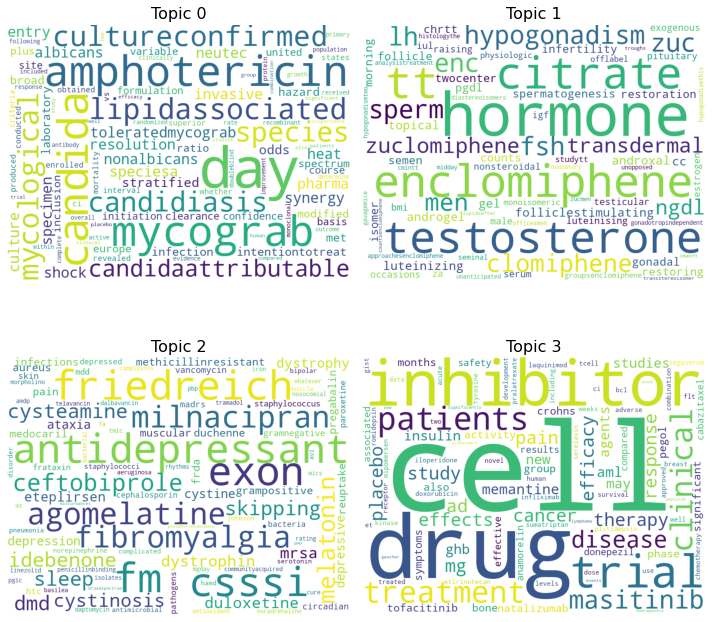

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

cloud = WordCloud(width = 800, height = 600, 
                  background_color ='white', 
                  stopwords = [], 
                  min_font_size = 10)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = ' '.join(topic_dict[i])
    cloud.generate(topic_words)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()